# Dynamic RNN

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt
import os

In [ ]:
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[[...]]], dtype=np.float32)

hidden_size = 2
cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn( cell, x_data, sequence_length=[5,3,4], dtype=tf.float32)

sess = tf.Session()
sess.run(tf.global_vatiables_initializer())
print(outputs.eval())

# Time Series Data RNN

In [6]:
timestep = seq_length = 7
data_dim = 5
output_dim = 1

# Open, High, Low, Close, Volume
xy = np.loadtxt('/Users/Baobab/Desktop/DeepLearningZeroToAll/data-02-stock_daily.csv', delimiter=',')
xy

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

### reverse order : 시간순서대로 정렬

In [8]:
xy = xy[::-1]
xy

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

### Nomalize 

In [12]:
def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = MinMaxScaler(xy)
xy

array([[9.73335806e-01, 9.75431522e-01, 1.00000000e+00, 1.11123062e-01,
        9.88313020e-01],
       [9.56900354e-01, 9.59881106e-01, 9.80354497e-01, 1.42502465e-01,
        9.77850239e-01],
       [9.47895670e-01, 9.49273354e-01, 9.72504893e-01, 1.14170476e-01,
        9.66454635e-01],
       ...,
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01]])

In [13]:
x = xy
y = xy[:, [-1]] # close as label

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i: i+seq_length]
    _y = y[i+seq_length] # Next close price
    print(_x, "->" , _y)
    dataX.append(_x)
    dataY.append(_y)

[[0.97333581 0.97543152 1.         0.11112306 0.98831302]
 [0.95690035 0.95988111 0.9803545  0.14250246 0.97785024]
 [0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]
 [0.94518557 0.94522671 0.96376051 0.09372591 0.95564213]
 [0.93644323 0.93932734 0.96226394 0.10667742 0.95211558]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]] -> [0.92390372]
[[0.95690035 0.95988111 0.9803545  0.14250246 0.97785024]
 [0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]
 [0.94518557 0.94522671 0.96376051 0.09372591 0.95564213]
 [0.93644323 0.93932734 0.96226394 0.10667742 0.95211558]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]] -> [0.92046468]
[[0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]
 [0.94518557 0.94522671 0.96376051 0.0

 [0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]] -> [0.83346838]
[[0.90409666 0.92262369 0.93095419 0.15143856 0.93424998]
 [0.87524689 0.8773021  0.8992042  0.11278121 0.89420545]
 [0.89943398 0.89022214 0.90516107 0.15681635 0.88721069]
 [0.88468858 0.89204311 0.91102983 0.15764991 0.90041324]
 [0.85441092 0.88340082 0.87445273 0.18365152 0.8822271 ]
 [0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]
 [0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]] -> [0.83247739]
[[0.87524689 0.8773021  0.8992042  0.11278121 0.89420545]
 [0.89943398 0.89022214 0.90516107 0.15681635 0.88721069]
 [0.88468858 0.89204311 0.91102983 0.15764991 0.90041324]
 [0.85441092 0.88340082 0.87445273 0.18365152 0.8822271 ]
 [0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]
 [0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]
 [0.83509035 0.82446533 0.83758227 0.12166353 0.83247739]] -> [0.85564731]
[[0.89943398 0.89022214 0.90516107 0.15681635 0.88721069]
 [0.88468858 0.892043

 [0.58928511 0.58346318 0.59989769 0.13766245 0.58232997]] -> [0.59937962]
[[0.64721766 0.657631   0.66950104 0.1399749  0.67215339]
 [0.63337563 0.64378601 0.65271648 0.13465985 0.64219292]
 [0.59368544 0.6239866  0.61781791 0.16296495 0.63700511]
 [0.59170387 0.59641216 0.61081348 0.15018374 0.60876407]
 [0.57069306 0.58898379 0.59112393 0.15108004 0.59206432]
 [0.58928511 0.58346318 0.59989769 0.13766245 0.58232997]
 [0.59149986 0.59155629 0.59696331 0.14675988 0.59937962]] -> [0.58422444]
[[0.63337563 0.64378601 0.65271648 0.13465985 0.64219292]
 [0.59368544 0.6239866  0.61781791 0.16296495 0.63700511]
 [0.59170387 0.59641216 0.61081348 0.15018374 0.60876407]
 [0.57069306 0.58898379 0.59112393 0.15108004 0.59206432]
 [0.58928511 0.58346318 0.59989769 0.13766245 0.58232997]
 [0.59149986 0.59155629 0.59696331 0.14675988 0.59937962]
 [0.57130509 0.5828272  0.59109455 0.22226405 0.58422444]] -> [0.57842471]
[[0.59368544 0.6239866  0.61781791 0.16296495 0.63700511]
 [0.59170387 0.596412

 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]] -> [0.63610164]
[[0.6864125  0.69003255 0.68038764 0.18480774 0.67713716]
 [0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]
 [0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.66251675 0.68537886 0.68763565 0.15226315 0.68652161]
 [0.65336639 0.66095504 0.66656666 0.13959846 0.66918059]
 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.64424521 0.64173375 0.65286317 0.17037734 0.63610164]] -> [0.65390889]
[[0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]
 [0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.66251675 0.68537886 0.68763565 0.15226315 0.68652161]
 [0.65336639 0.66095504 0.66656666 0.13959846 0.66918059]
 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.64424521 0.64173375 0.65286317 0.17037734 0.63610164]
 [0.62900446 0.64248529 0.65274585 0.12979296 0.65390889]] -> [0.6423386]
[[0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.66251675 0.6853788

[[0.11154565 0.13591215 0.12843129 0.17308416 0.13589432]
 [0.12279408 0.11796265 0.12382429 0.16997401 0.12076831]
 [0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]] -> [0.1455995]
[[0.12279408 0.11796265 0.12382429 0.16997401 0.12076831]
 [0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]] -> [0.1361567]
[[0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]
 [0.1111668  0.12883062 0.12954637 0.135

 [0.26911948 0.27043949 0.28592698 0.12876221 0.28188707]] -> [0.26877183]
[[0.27072216 0.26593044 0.25417696 0.17191001 0.24047238]
 [0.2529752  0.27069971 0.27278097 0.15418123 0.2781564 ]
 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.28899382 0.28318331 0.28140806 0.15072152 0.27634948]
 [0.28223302 0.29049908 0.29913189 0.33420274 0.30173448]
 [0.26911948 0.27043949 0.28592698 0.12876221 0.28188707]
 [0.24874968 0.26460085 0.26766042 0.1510173  0.26877183]] -> [0.25472422]
[[0.2529752  0.27069971 0.27278097 0.15418123 0.2781564 ]
 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.28899382 0.28318331 0.28140806 0.15072152 0.27634948]
 [0.28223302 0.29049908 0.29913189 0.33420274 0.30173448]
 [0.26911948 0.27043949 0.28592698 0.12876221 0.28188707]
 [0.24874968 0.26460085 0.26766042 0.1510173  0.26877183]
 [0.22762223 0.24720044 0.24971659 0.13197096 0.25472422]] -> [0.23476016]
[[0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.28899382 0.283183

# Training and Test datasets

In [17]:
hidden_dim = 10
tf.reset_default_graph() # 변수가 이미 생성되어 있을 때 사용.
# Split to train and testing
train_size = int(len(dataY) * 0.7)
test_sieze = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

# input placeholders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

cell = rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn = None)

# Cost/Loss
loss = tf.reduce_sum(tf.square(Y_pred - Y)) # sum of the squares
# Optimizer
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)


In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    _, l = sess.run([train, loss], feed_dict={X:trainX, Y:trainY})
    print(i, l)
    
testPredict = sess.run(Y_pred, feed_dict={X:testX})

0 449.72385
1 333.50186
2 238.9391
3 162.96956
4 103.64181
5 59.295628
6 29.191454
7 13.39219
8 11.78836
9 21.551382
10 34.055912
11 40.622295
12 39.42073
13 33.05781
14 24.997793
15 17.817879
16 12.779636
17 10.07046
18 9.261731
19 9.708977
20 10.795199
21 12.0347595
22 13.093186
23 13.769876
24 13.970564
25 13.681413
26 12.947981
27 11.858899
28 10.532468
29 9.104208
30 7.7137012
31 6.4894953
32 5.5322742
33 4.8982096
34 4.586489
35 4.5363154
36 4.6379037
37 4.7580104
38 4.774428
39 4.6086264
40 4.24495
41 3.7296357
42 3.1509504
43 2.6086662
44 2.1839051
45 1.9186058
46 1.8092343
47 1.8141696
48 1.870358
49 1.9132196
50 1.8941535
51 1.7917194
52 1.6145359
53 1.3958999
54 1.1817998
55 1.0154806
56 0.92307514
57 0.9051766
58 0.9378768
59 0.9833482
60 1.0057498
61 0.9854338
62 0.9251558
63 0.84599054
64 0.7757104
65 0.7356747
66 0.7322878
67 0.75622207
68 0.7886599
69 0.81079125
70 0.81193256
71 0.79292625
72 0.763986
73 0.73863167
74 0.7268966
75 0.7310046
76 0.7453278
77 0.7601987
78 

578 0.38197312
579 0.38160267
580 0.38123304
581 0.3808642
582 0.3804962
583 0.38012904
584 0.37976277
585 0.37939718
586 0.37903237
587 0.37866846
588 0.37830532
589 0.37794298
590 0.37758142
591 0.3772205
592 0.3768604
593 0.37650114
594 0.37614268
595 0.37578478
596 0.3754278
597 0.37507156
598 0.37471598
599 0.37436113
600 0.37400723
601 0.37365377
602 0.37330124
603 0.37294933
604 0.372598
605 0.37224764
606 0.3718979
607 0.3715488
608 0.37120044
609 0.3708529
610 0.37050584
611 0.37015954
612 0.36981392
613 0.36946905
614 0.36912477
615 0.36878112
616 0.36843833
617 0.36809608
618 0.36775446
619 0.36741355
620 0.36707324
621 0.36673364
622 0.36639464
623 0.36605635
624 0.36571863
625 0.36538154
626 0.36504507
627 0.36470926
628 0.3643741
629 0.36403942
630 0.3637056
631 0.36337224
632 0.3630395
633 0.3627074
634 0.36237577
635 0.3620449
636 0.36171457
637 0.36138484
638 0.36105567
639 0.3607271
640 0.36039913
641 0.36007178
642 0.359745
643 0.35941878
644 0.3590931
645 0.358768
6

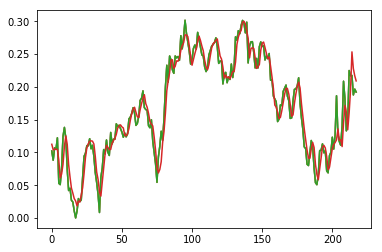

In [21]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()